# **Exploratory Data Analysis (EDA) on Weather Dataset**


The purpose of this project is to practice exploratory data analysis (EDA) .

Goals of the Project:

1. Explore a weather dataset with Pandas.
2. Identifying correlations.
3. Visualize the dataset .

### Importing Libraries

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Reading the csv file</h2>
<p>Dataset Source: Kaggle <br>
    Weather Location: Leeds, England <br>
URL: <a href="https://www.kaggle.com/datasets/muthuj7/weather-dataset">https://www.kaggle.com/datasets/muthuj7/weather-dataset</a></p>

In [100]:
df=pd.read_csv("weatherHistory.csv")
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [211]:
df.shape

(96453, 13)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Precip Type               95936 non-null  object             
 2   Temperature (C)           96453 non-null  float64            
 3   Apparent Temperature (C)  96453 non-null  float64            
 4   Humidity                  96453 non-null  float64            
 5   Wind Speed (km/h)         96453 non-null  float64            
 6   Wind Bearing (degrees)    96453 non-null  float64            
 7   Visibility (km)           96453 non-null  float64            
 8   Pressure (millibars)      96453 non-null  float64            
 9   Year                      96453 non-null  int32              
 10  Month                     96453 non-null  int32              
 11  Day            

## Cleaning and Formatting Data

#### Converting Formatted Date column to Datetime


In [102]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.dtypes["Formatted Date"]

datetime64[ns, UTC]

#### Dropping loud cover as it has only one value 

In [ ]:
df.drop('Loud Cover', axis=1, inplace=True)

#### Dropping Daily Summary and Summary since we dont actually need it 

In [103]:
df.drop('Daily Summary', axis=1, inplace=True)
df.drop('Summary', axis=1, inplace=True)

In [104]:
df.dtypes

Formatted Date              datetime64[ns, UTC]
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Pressure (millibars)                    float64
dtype: object

## Exploratory Data Analysis

### Summary Statistics

In [67]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


<h3>Correlation between numeric values</h3>
<p>
The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.

The number varies from -1 to 1.

1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

-0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.<p>

In [27]:
numeric_df = df.select_dtypes(include=[float, int])
numeric_df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


#### From the formatted DATE column,  year, month and date and time can be separted into new columns

In [106]:
df['Year'] = df['Formatted Date'].dt.year
df['Month'] = df['Formatted Date'].dt.month
df['Day'] = df['Formatted Date'].dt.day
df['Time'] = df['Formatted Date'].dt.time

## Visualizations

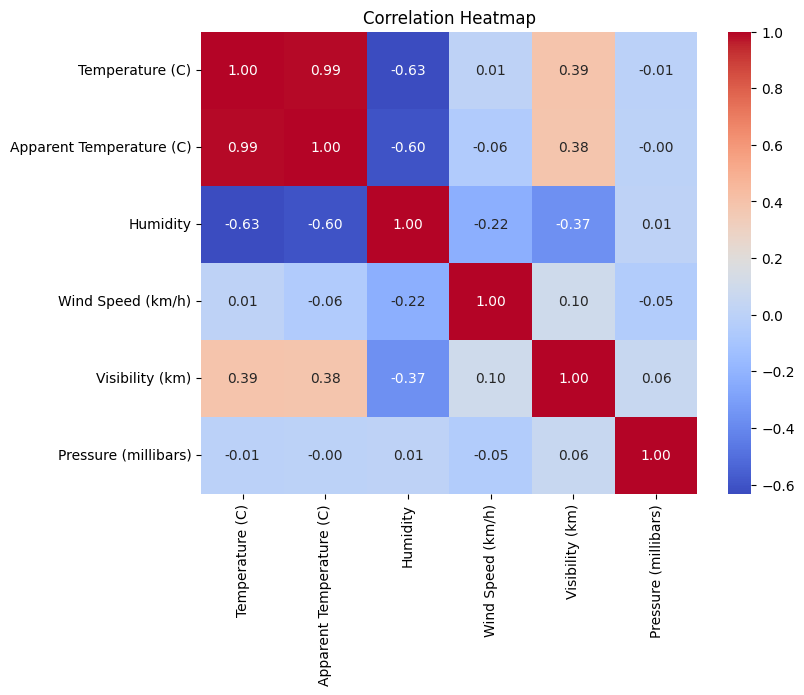

In [197]:
corr_data = df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']]
corr_matrix = correlation_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

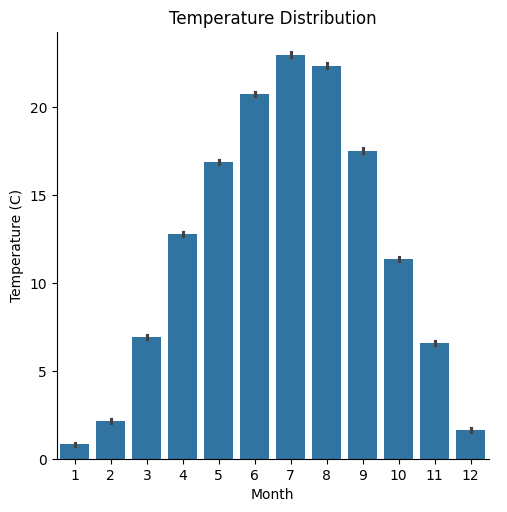

In [212]:
sns.catplot(x='Month', y='Temperature (C)', data=df,kind='bar')
plt.title('Temperature Distribution') 
plt.show()

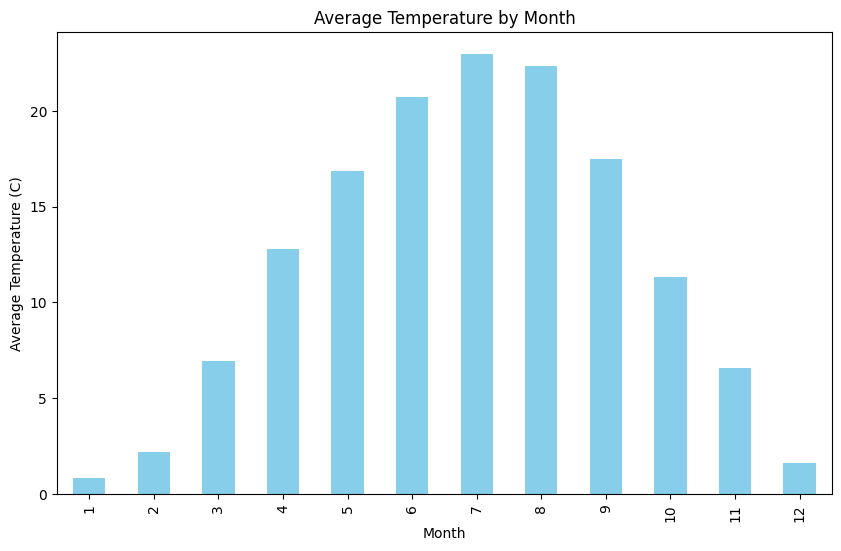

In [193]:
monthly_avg_temp = df.groupby('Month')['Temperature (C)'].mean()
plt.figure(figsize=(10, 6))
monthly_avg_temp.plot(kind='bar', color='skyblue')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (C)')
plt.show()

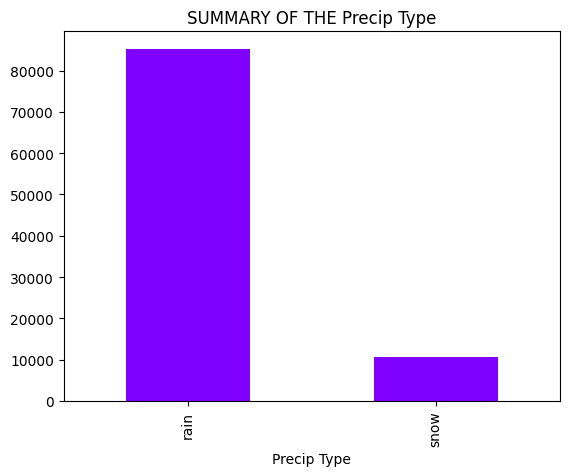

In [198]:
df['Precip Type'].value_counts().plot(kind='bar', cmap='rainbow')
plt.title('SUMMARY OF THE Precip Type')
plt.show()

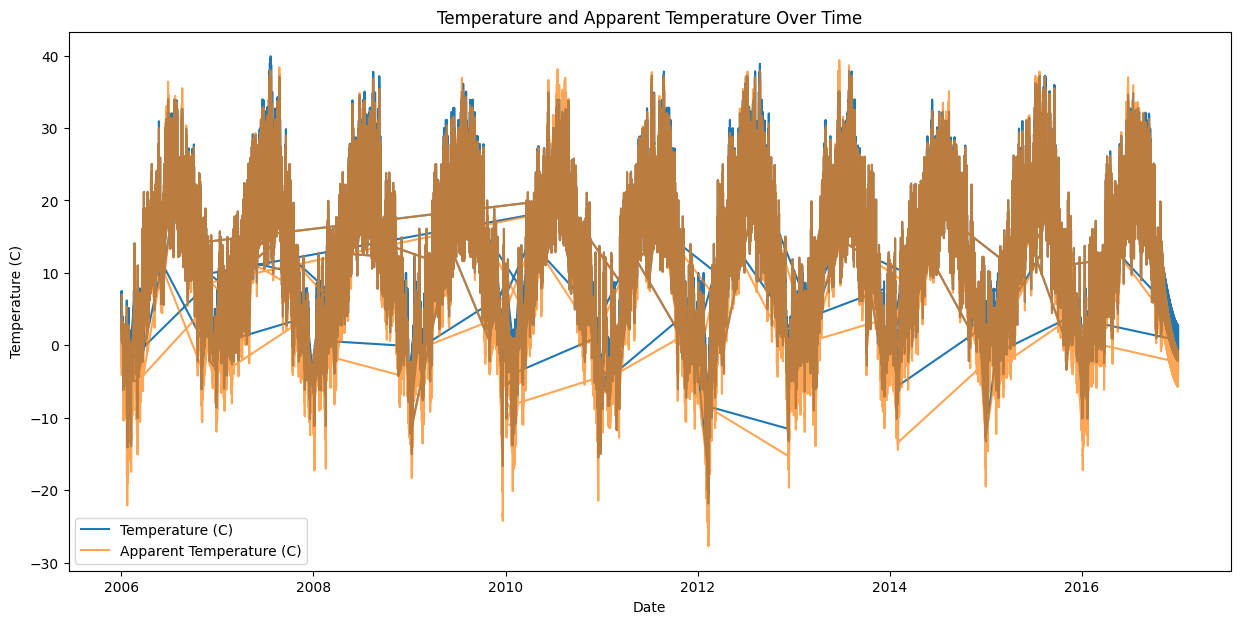

In [177]:
plt.figure(figsize=(15, 7))
plt.plot(df['Formatted Date'], df['Temperature (C)'], label='Temperature (C)')
plt.plot(df['Formatted Date'], df['Apparent Temperature (C)'], label='Apparent Temperature (C)', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature and Apparent Temperature Over Time')
plt.legend()
plt.show()

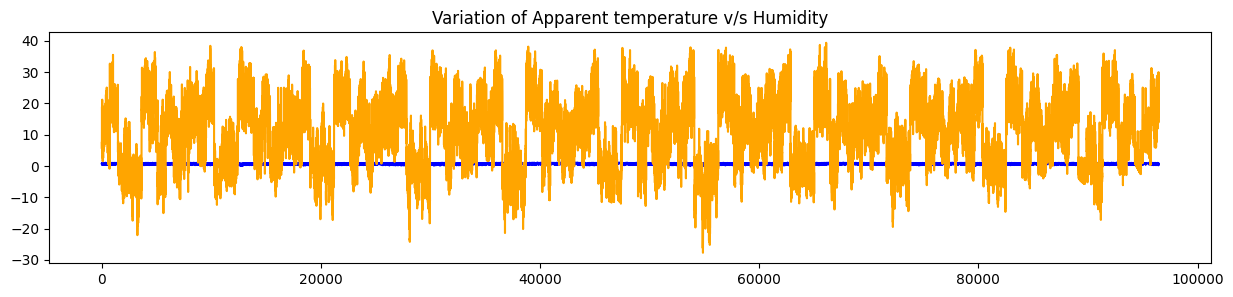

In [217]:
plt.figure(figsize=(15,3));
plt.plot(new_df['Humidity'], label = 'Humidity', color ='blue',linestyle='dashed');
plt.plot(new_df['Apparent Temperature (C)'], label = 'Apparent temp.', color  = 'orange');
plt.title('Variation of Apparent temperature v/s Humidity');

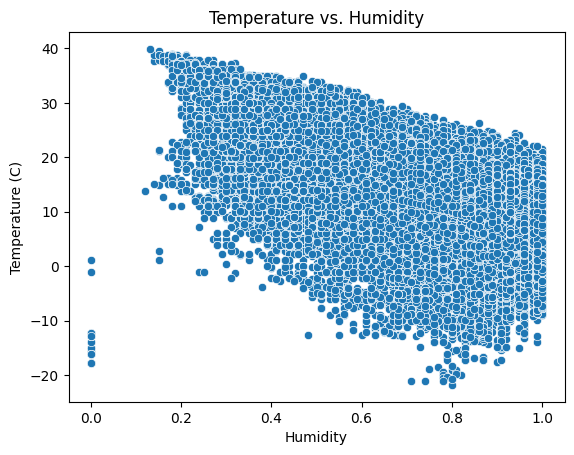

In [188]:
sns.scatterplot(x='Humidity', y='Temperature (C)', data=df)
plt.title('Temperature vs. Humidity') 
plt.show()